<a href="https://colab.research.google.com/github/DrMelissaFranklin/Docker.dsub/blob/main/Mel_Spotify_Annotated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Music Popularity Prediction


#PROBLEM DEFINITION:

### This is a supervised learning problem that will use labeled target data in the form of features collected for popular songs, defining "popular" as those songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021.

### The goal is to predict the popularity of a song using a tree-based regression model trained on the most important features.



The outcomes for the project will be to:

- Minimize the cross-validated ***root mean squared error ( RMSE )*** when predicting the popularity of a new song.

- Determine the importance of the features in driving the regression result using the parameters of the trees after carefully selecting to avoid over-fitting.


There are three main challenges for this project:

1. Determining the outcome ( i.e. target ).  There is a "popularity" column.  But other columns may or may not be more appropriate indicators of popularity.

1. Choosing appropriate predictors ( i.e. features ). When building a machine learning model, we want to make sure that we consider how the model will be ultimately used. For this project, we are predicting the popularity of a new song. Therefore, we should only include the predictors we would have for a new song.

1. Data cleaning and feature engineering. Some creative cleaning and/or feature engineering may be needed to extract useful information for prediction.



Once again, be sure to go through the whole data science process and document as such in your Jupyter notebook.

The data is available AWS at https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .



In [1]:
# import Tools

import pandas as pd
from functools import reduce
import numpy as np

from scipy import stats
import statsmodels.api as sm

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from sklearn.model_selection import train_test_split #training it
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor #the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import re

import pickle

#Data Source

In [2]:
# Define a variable "url" with the location of a file on the internet. Then, use the curl command to get information about the file at that location, such as its type, size, and other metadata provided in the header of the webpage. Since only the -I flag is used, it does not download the actual file, but only shows its header information

url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -I {url}

# !: In Colab/Jupyter notebooks, the exclamation mark (!) allows you to execute shell commands (commands you'd typically run in a terminal)

# curl: This is the command used for transferring data to or from a server.

# -I: This option tells curl to only fetch the HTTP headers of the response (not the actual file content). Headers provide metadata about the file, like its size, type, and last modified date.

 # {url}: This part substitutes the value of the defined "url" variable into the command, so curl knows which URL to access.

HTTP/1.1 200 OK
x-amz-id-2: nahJM1L8NN13hbrAl0KFsVosUKJJmrFT84V8sC/Z6JdVjT4nnB6WJTJ3/BCX6AT9edzomjhed8w=
x-amz-request-id: 6SJT2B2KM0ZFE6T8
Date: Tue, 05 Nov 2024 15:46:53 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Server: AmazonS3
Content-Length: 738124



HTTP/1.1 200 OK: This is the status line.
HTTP/1.1 indicates the version of the HTTP protocol used.
200 OK is the status code, and it means the request was successful. Your request to access the file at the specified URL was successful, and the server is sending back the data.

x-amz-id-2, x-amz-request-id: These are Amazon S3-specific headers providing unique identifiers for the request and the data transfer.

Date: This shows when the server generated the response.

Last-Modified: This shows when the file on the server was last modified.

ETag: This is a unique identifier for the current version of the file.

x-amz-server-side-encryption: This tells you the file is encrypted on Amazon S3's servers for security.

Accept-Ranges: This means the server supports partial downloads (e.g., downloading specific ranges of bytes).

Content-Type: This tells you the type of data being sent. In this case, it's "text/csv", indicating a comma-separated values file.

Server: This tells you the software running on the server (Amazon S3).

Content-Length: This shows the size of the file in bytes (738124 bytes).


In [3]:
# Above: size = 738124 bytes

# Read the csv file and print the head

spot_df = pd.read_csv(url)
spot_df.head().transpose()

,0,1,2,3,4
Index,1,2,3,4,5
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Week of Highest Charting,2021-07-23--2021-07-30,2021-07-23--2021-07-30,2021-06-25--2021-07-02,2021-07-02--2021-07-09,2021-07-23--2021-07-30
Song Name,Beggin',STAY (with Justin Bieber),good 4 u,Bad Habits,INDUSTRY BABY (feat. Jack Harlow)
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist,Måneskin,The Kid LAROI,Olivia Rodrigo,Ed Sheeran,Lil Nas X
Artist Followers,3377762,2230022,6266514,83293380,5473565
Song ID,3Wrjm47oTz2sjIgck11l5e,5HCyWlXZPP0y6Gqq8TgA20,4ZtFanR9U6ndgddUvNcjcG,6PQ88X9TkUIAUIZJHW2upE,27NovPIUIRrOZoCHxABJwK
Genre,"['indie rock italiano', 'italian pop']",['australian hip hop'],['pop'],"['pop', 'uk pop']","['lgbtq+ hip hop', 'pop rap']"


In [4]:
spot_df.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [5]:
spot_df.shape

(1556, 23)

#Data Cleaning

In [6]:
spot_df = spot_df.nunique()
spot_df

,0
Index,1556
Highest Charting Position,200
Number of Times Charted,75
Week of Highest Charting,83
Song Name,1556
Streams,1556
Artist,716
Artist Followers,600
Song ID,1517
Genre,395


In [7]:
#Drop 3 identifier columns, drop 2 messy date columns (i.e.,. we don't care about dates when a song was popular), drop 3 nominal columns

spot_df = pd.read_csv(url, header=0)

spot_df.drop(['Index','Week of Highest Charting','Song ID', 'Release Date', 'Weeks Charted', 'Song Name', 'Artist', 'Genre', 'Chord'], axis=1, inplace=True)

spot_df.head().transpose()

,0,1,2,3,4
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist Followers,3377762,2230022,6266514,83293380,5473565
Popularity,100,99,99,98,96
Danceability,0.714,0.591,0.563,0.808,0.736
Energy,0.8,0.764,0.664,0.897,0.704
Loudness,-4.808,-5.484,-5.044,-3.712,-7.409
Speechiness,0.0504,0.0483,0.154,0.0348,0.0615
Acousticness,0.127,0.0383,0.335,0.0469,0.0203


In [8]:
spot_df_noID = spot_df.copy()
#rename df to indicate identifiers et al have been removed
spot_df_noID.head().transpose()
#print the head to inspect

,0,1,2,3,4
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist Followers,3377762,2230022,6266514,83293380,5473565
Popularity,100,99,99,98,96
Danceability,0.714,0.591,0.563,0.808,0.736
Energy,0.8,0.764,0.664,0.897,0.704
Loudness,-4.808,-5.484,-5.044,-3.712,-7.409
Speechiness,0.0504,0.0483,0.154,0.0348,0.0615
Acousticness,0.127,0.0383,0.335,0.0469,0.0203


In [9]:
# 1556 rows, 14 cols instead of 23 without Identifiers, Dates, or Nominal data
spot_df_noID.shape


(1556, 14)

In [10]:
spot_df_noID.dtypes
# Comparing the head to the dtype output reveals that many "object" type are actually numeric type

,0
Highest Charting Position,int64
Number of Times Charted,int64
Streams,object
Artist Followers,object
Popularity,object
Danceability,object
Energy,object
Loudness,object
Speechiness,object
Acousticness,object


In [11]:
# Remove commas from 'Streams' column
if 'Streams' in spot_df_noID.columns:
    spot_df_noID['Streams'] = spot_df_noID['Streams'].astype(str).str.replace(',', '')

In [12]:
# Prepare to convert object types that are actually numbers into numeric type

# List the precise column names before attempting conversion and confirm they exist before conversion

# Convert all columns to numeric
for col in ['Streams', 'Artist Followers', 'Popularity', 'Liveness','Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Tempo', 'Duration (ms)', 'Valence']:
    if col in spot_df_noID.columns:  # Confirm the column exists
        spot_df_noID[col] = pd.to_numeric(spot_df_noID[col], errors='coerce')  # Convert to numeric, setting non-convertible to NaN
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

spot_df_noID.head().transpose()

,0,1,2,3,4
Highest Charting Position,1.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00
Number of Times Charted,8.000000e+00,3.000000e+00,1.100000e+01,5.000000e+00,1.000000e+00
Streams,4.863345e+07,4.724872e+07,4.016256e+07,3.779946e+07,3.394845e+07
Artist Followers,3.377762e+06,2.230022e+06,6.266514e+06,8.329338e+07,5.473565e+06
Popularity,1.000000e+02,9.900000e+01,9.900000e+01,9.800000e+01,9.600000e+01
Danceability,7.140000e-01,5.910000e-01,5.630000e-01,8.080000e-01,7.360000e-01
Energy,8.000000e-01,7.640000e-01,6.640000e-01,8.970000e-01,7.040000e-01
Loudness,-4.808000e+00,-5.484000e+00,-5.044000e+00,-3.712000e+00,-7.409000e+00
Speechiness,5.040000e-02,4.830000e-02,1.540000e-01,3.480000e-02,6.150000e-02
Acousticness,1.270000e-01,3.830000e-02,3.350000e-01,4.690000e-02,2.030000e-02


In [13]:
spot_df_noID.shape
# Confirm rows and columns are still present - yes

(1556, 14)

In [14]:
spot_df_noID.describe().transpose()
# Basic stats on the variables; notice row numbers for some are different by 11

,count,mean,std,min,25%,50%,75%,max
Highest Charting Position,1556.0,8.774422e+01,5.814723e+01,1.000000e+00,3.700000e+01,8.000000e+01,1.370000e+02,2.000000e+02
Number of Times Charted,1556.0,1.066838e+01,1.636055e+01,1.000000e+00,1.000000e+00,4.000000e+00,1.200000e+01,1.420000e+02
Streams,1556.0,6.340219e+06,3.369479e+06,4.176083e+06,4.915322e+06,5.275748e+06,6.455044e+06,4.863345e+07
Artist Followers,1545.0,1.471690e+07,1.667579e+07,4.883000e+03,2.123734e+06,6.852509e+06,2.269875e+07,8.333778e+07
Popularity,1545.0,7.008932e+01,1.582403e+01,0.000000e+00,6.500000e+01,7.300000e+01,8.000000e+01,1.000000e+02
Danceability,1545.0,6.899968e-01,1.424440e-01,1.500000e-01,5.990000e-01,7.070000e-01,7.960000e-01,9.800000e-01
Energy,1545.0,6.334951e-01,1.615770e-01,5.400000e-02,5.320000e-01,6.420000e-01,7.520000e-01,9.700000e-01
Loudness,1545.0,-6.348474e+00,2.509281e+00,-2.516600e+01,-7.491000e+00,-5.990000e+00,-4.711000e+00,1.509000e+00
Speechiness,1545.0,1.236557e-01,1.103827e-01,2.320000e-02,4.560000e-02,7.650000e-02,1.650000e-01,8.840000e-01
Acousticness,1545.0,2.486945e-01,2.503259e-01,2.550000e-05,4.850000e-02,1.610000e-01,3.880000e-01,9.940000e-01


In [15]:
spot_df_noID.dtypes
# Confirm datatypes for columns with numbers are now numeric

,0
Highest Charting Position,int64
Number of Times Charted,int64
Streams,int64
Artist Followers,float64
Popularity,float64
Danceability,float64
Energy,float64
Loudness,float64
Speechiness,float64
Acousticness,float64


In [16]:
# Are there nulls?  yes, by 11
null_counts = spot_df_noID.isna().sum()
print(null_counts)

Highest Charting Position     0
Number of Times Charted       0
Streams                       0
Artist Followers             11
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
dtype: int64


In [17]:
# Remove the nulls
spot_df_noID.dropna(inplace=True)

In [18]:
# Confirm the nulls are removed
null_counts = spot_df_noID.isna().sum()
print(null_counts)

Highest Charting Position    0
Number of Times Charted      0
Streams                      0
Artist Followers             0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
dtype: int64


#Exploratory Data Analysis


In [23]:
# Copy the df for Data Analysis and check the head
df_num = spot_df_noID.copy()
df_num.head().transpose()

,0,1,2,3,4
Highest Charting Position,1.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00
Number of Times Charted,8.000000e+00,3.000000e+00,1.100000e+01,5.000000e+00,1.000000e+00
Streams,4.863345e+07,4.724872e+07,4.016256e+07,3.779946e+07,3.394845e+07
Artist Followers,3.377762e+06,2.230022e+06,6.266514e+06,8.329338e+07,5.473565e+06
Popularity,1.000000e+02,9.900000e+01,9.900000e+01,9.800000e+01,9.600000e+01
Danceability,7.140000e-01,5.910000e-01,5.630000e-01,8.080000e-01,7.360000e-01
Energy,8.000000e-01,7.640000e-01,6.640000e-01,8.970000e-01,7.040000e-01
Loudness,-4.808000e+00,-5.484000e+00,-5.044000e+00,-3.712000e+00,-7.409000e+00
Speechiness,5.040000e-02,4.830000e-02,1.540000e-01,3.480000e-02,6.150000e-02
Acousticness,1.270000e-01,3.830000e-02,3.350000e-01,4.690000e-02,2.030000e-02


In [24]:
#Set up for Decision Tree Regression to identify the most important features (that explain the highest proportion of variance relevant to song popularity)


X = df_num.drop('Popularity', axis = 1) # Assign the result of df_num.drop to X, not X_train
y = df_num['Popularity']

numLoops = 500

mean_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # X_train should be re-assigned in each loop
  model = DecisionTreeRegressor(max_depth=5, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)

print(f'RMSE: {np.sqrt(mean_error).mean()*1000}')
print(f'RMSE_std: {np.sqrt(mean_error).std()*1000}')

RMSE: 10015.925000934461
RMSE_std: 1285.4986290337329


In [35]:
# Build a Decision Tree, chosing different depth values 1-10:

max_depths = [1,2,3,4,5,6,7,8,9,10] #the depth values to be tested
rms_depth = np.zeros(len(max_depths)) #Stores the array for avg RMSE
std_depth = np.zeros(len(max_depths)) #stand dev of RMSE

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )

print(f"rms_depth[{n}] = {rms_depth[n]}")  # Print the value of rms_depth[n]
print(f"std_depth[{n}] = {std_depth[n]}")  # Print the value of std_depth[n]

rms_depth[0] = 15.2209524580183
rms_depth[1] = 13.763979383060304
rms_depth[2] = 10.69414088824522
rms_depth[3] = 10.091282407928848
rms_depth[4] = 9.873988100349125
rms_depth[5] = 10.062505017913617
rms_depth[6] = 10.200232862385963
rms_depth[7] = 10.458130161494116
rms_depth[8] = 10.712758861765844
rms_depth[9] = 10.900138943137875
std_depth[9] = 1.1532440313005403


In [36]:
pd.DataFrame( zip( max_depths, rms_depth, std_depth ) )

,0,1,2
0,1,15.220952,1.189112
1,2,13.763979,2.420402
2,3,10.694141,1.589864
3,4,10.091282,1.431257
4,5,9.873988,1.235004
5,6,10.062505,1.365184
6,7,10.200233,1.367842
7,8,10.458130,1.269620
8,9,10.712759,1.315534
9,10,10.900139,1.153244


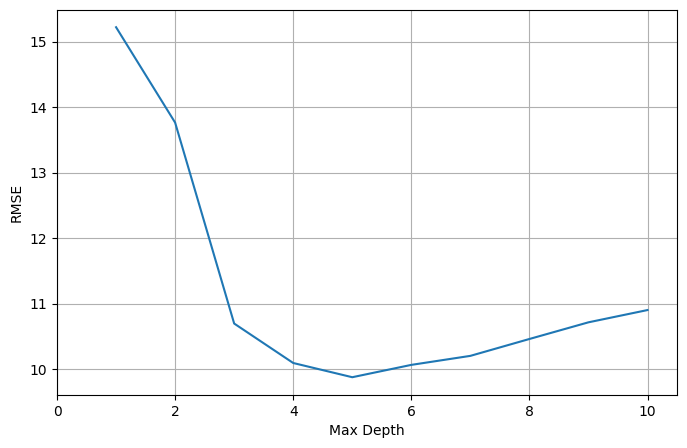

In [37]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()

In [38]:
# Create a Decision Tree
numLoops = 500

rms_error = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )
  model = DecisionTreeRegressor( max_depth=4 ) #training the model with regressors
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  rms_error[idx] = np.sqrt( mean_squared_error( y_test, y_pred ) )

print(f"CV RMSE: {rms_error.mean().round(2)}") #recall RMSE is the mean of all the RMSE

CV RMSE: 10.18


In [29]:
import graphviz
from IPython.display import display
from sklearn import tree

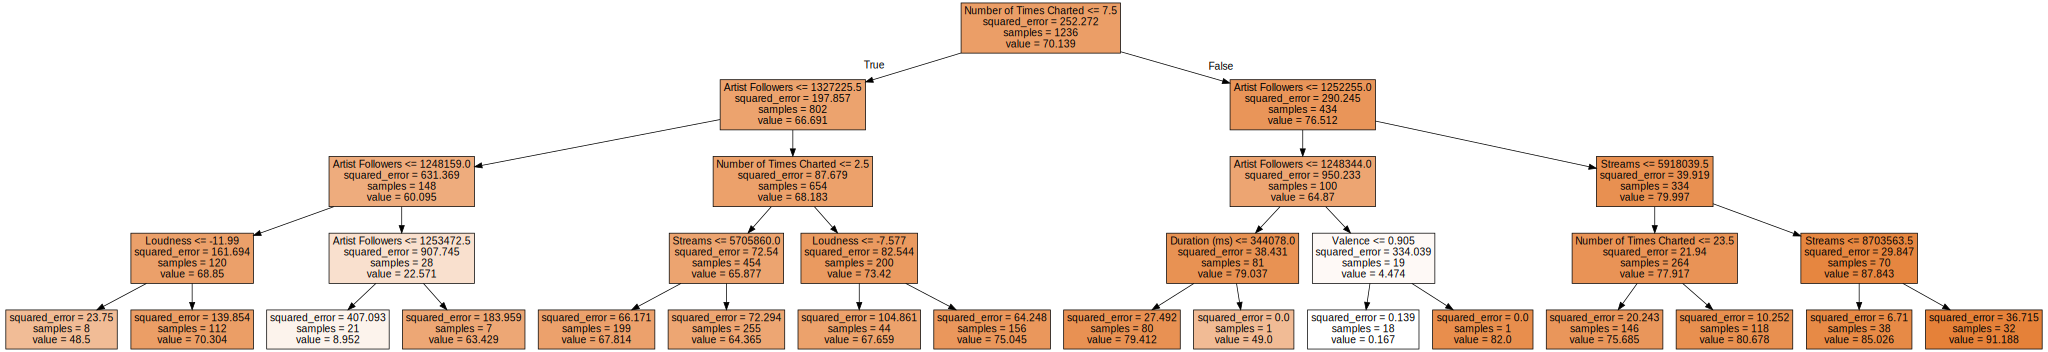

In [39]:
# Option 1 - to train the model we use ALL the features (columns) but the model picks the features by looking at all combinations and as a result it chooses how many to include at each level.
display(
  graphviz.Source(
    tree.export_graphviz(
      model,
      feature_names = X.columns,
      filled = True,
    )
  )
)

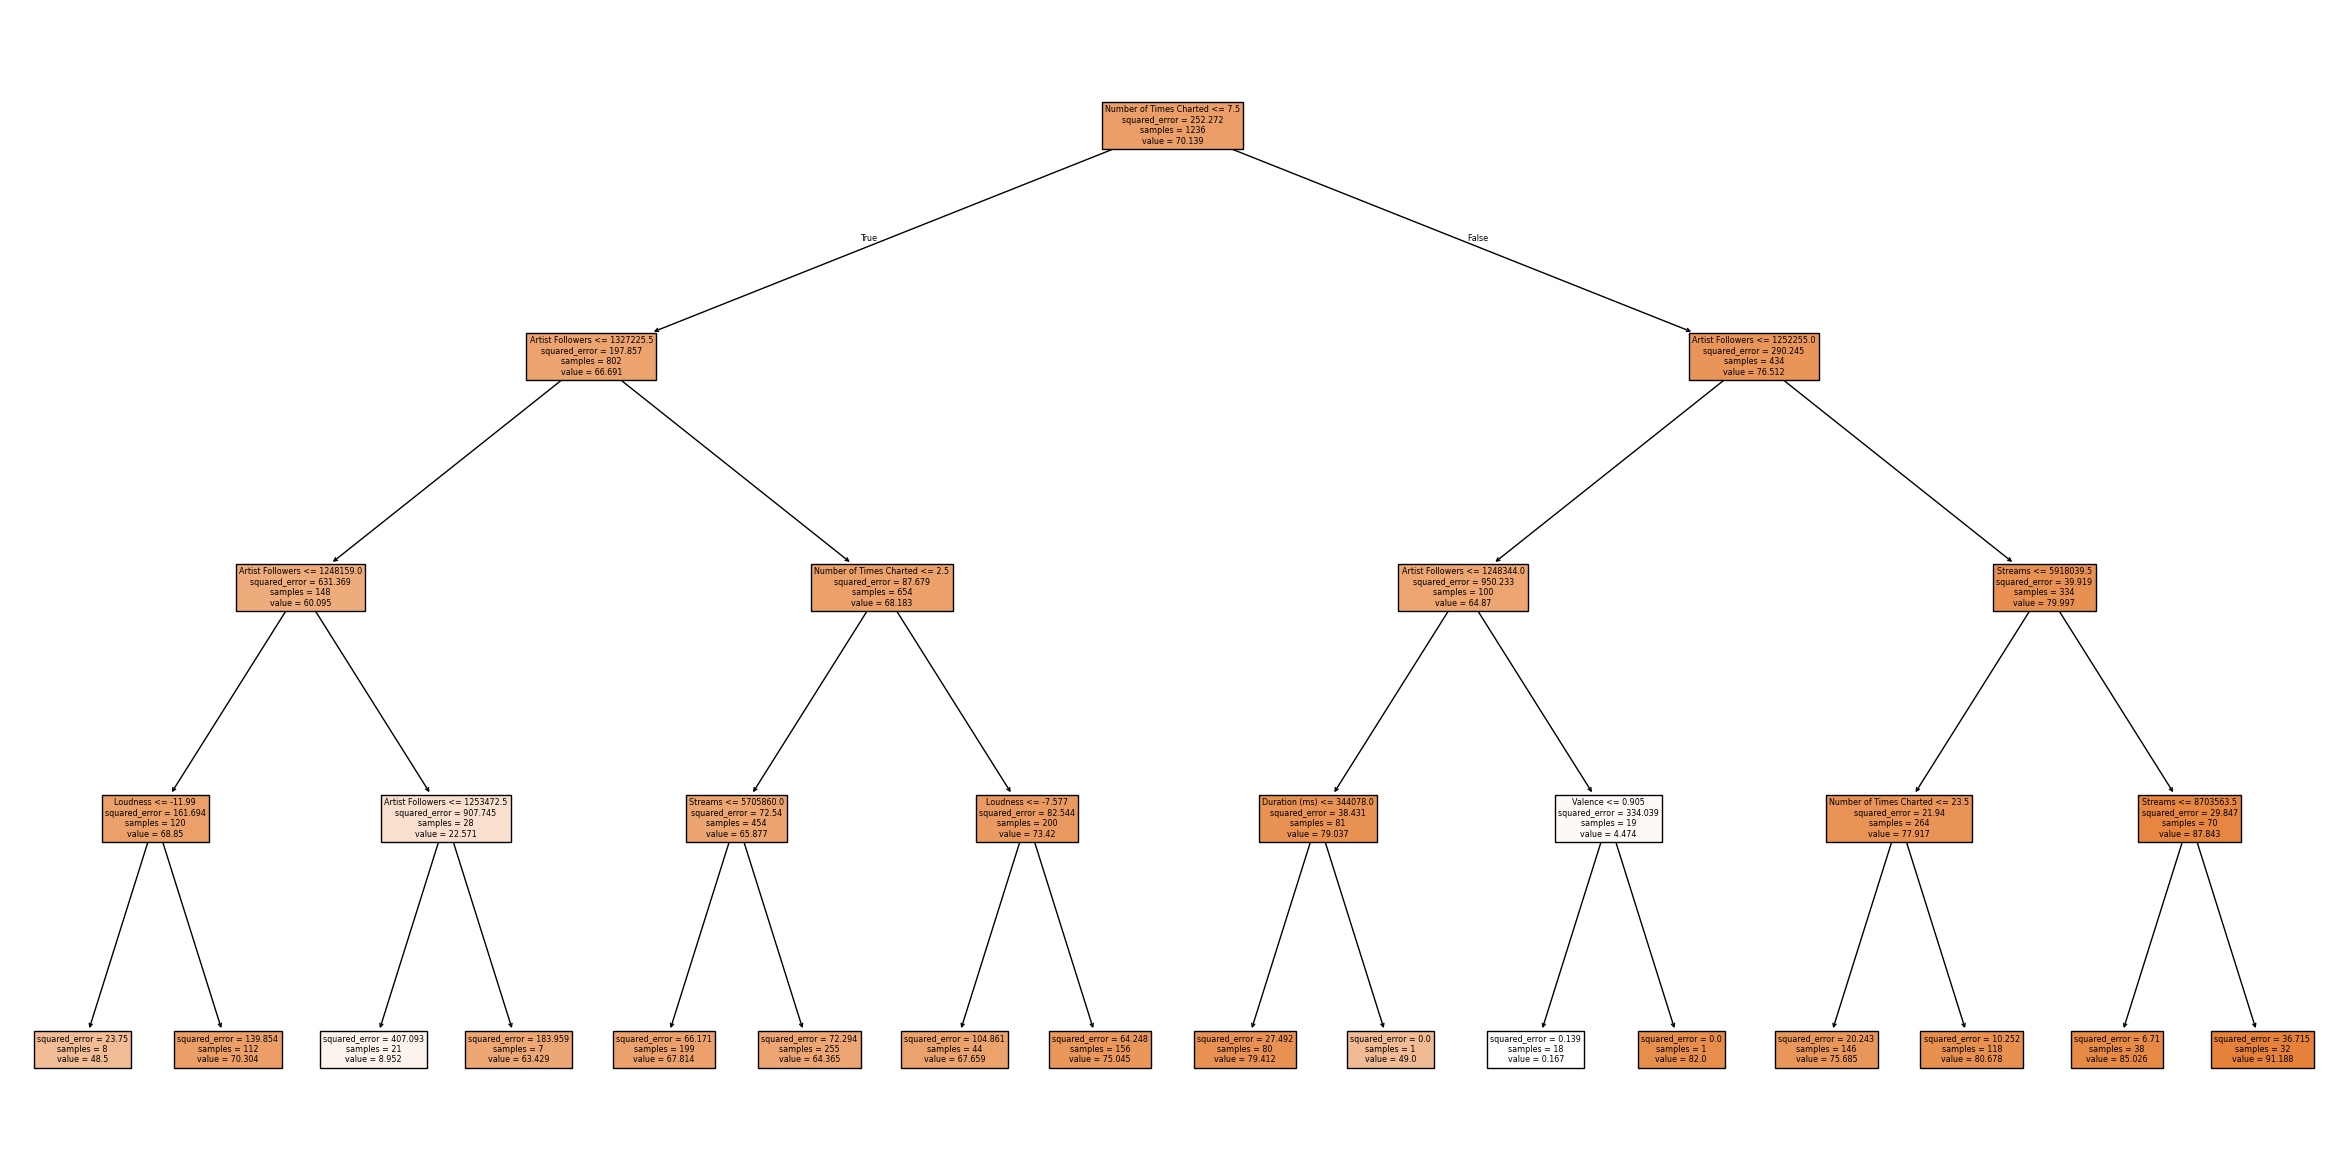

In [40]:
# Option 2 - so we can see the full model
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model,
  feature_names = X.columns,
  filled=True,
)

#Forest Regression

In [32]:
X = df_num.drop('Popularity', axis = 1)
y = df_num['Popularity']

In [33]:
# #Set up for Forest Regression to identify the most important features (that explain the highest proportion of variance relevant to song popularity)
numLoops = 500

mean_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 )
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'RMSE: {np.sqrt(mean_error).mean()*1000}')
print(f'RMSE_std: {np.sqrt(mean_error).std()*1000}')
np.sqrt(mean_error)[:50]

RMSE: 9228.361060426563
RMSE_std: 997.8155927690036


array([ 9.44032698,  8.41132885,  8.19468807,  9.84584745,  8.25347823,
        8.26296373, 10.63122348,  9.74285565,  9.09826969, 10.72584816,
       10.04627642,  9.5734091 ,  9.29448805,  9.78582622, 12.94257794,
        9.55248659,  8.88309183, 10.02050002,  7.54826541, 10.2359747 ,
        9.06700516, 10.37055516,  8.59383199, 10.66813754,  8.94954212,
        9.98888703,  9.01870225,  8.78360123, 10.55640115,  8.680421  ,
        9.09787485,  8.87956091,  8.73156866, 10.13802161, 10.7563423 ,
       10.12793567,  8.81094862,  8.42407169,  9.64921648,  8.51443663,
        8.0747539 ,  9.7239986 ,  8.08450914, 10.4335639 ,  8.73348279,
        7.58853888, 10.26673391, 10.53295337,  9.93075866,  9.54346215])

In [ ]:
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()
#try some more trees...

In [ ]:
pickle.dump(rfModel, open('rfModel.p','wb'))

In [ ]:
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()
#it looks lower without the origin, zoomed in
#put in an origin and it doesn't look that different, but might as well use it...

In [ ]:
pd.DataFrame( zip( rmse_results, std_results, ) )

In [ ]:
print(f'RMSE with 30 trees: {rmse_results[2]*1000}')

In [ ]:
import graphviz
from IPython.display import display
from sklearn import tree

In [ ]:
len(rfModel.estimators_)

In [ ]:
# Display ONE tree from the random forest of 50 trees
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[0],
      feature_names = X.columns,
    )
  )
)
#you get 2 to the 15 possibilities - over 300,000

In [ ]:
# Option 2
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model,
  feature_names = X.columns,
  filled=True,
)

In [ ]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

# the feature importances add up to 100% so this is the % of the data accounted for my each feature

In [ ]:
( forest_importances.sort_values( ascending = False ) * 100 ).cumsum()
# this is the cumulative sum of the feature importances and could cut it off at prop_tax (there is less than 1% improvement above 96.79 for prop tax, so you could drop all those and run it again)
#the percentages are a running total of how much variance accounted for by the feature (it's in descending order)

In [ ]:
#One Hot Encode for artist, song name, genre???

#Data Visualization

#Communication of Results